<center>
<h1>Fake news detection using graph neural network</h1>
<h2>SAGE GNN</h2>
<i><h6>Victor GOUBET | Nicholas Tagliapietra | Asma Bakhtiariazad</h6></i>
</center>


----

# Library

In [1]:
import torch
import pickle as pk
import torch.nn.functional as F

from torch.nn import Linear, LogSoftmax
from tool_box.upfd_dataset import ext_UPFD
from tool_box.GNN_train import plot_hist, train_all_and_optimize
from torch_geometric.nn import SAGEConv, global_mean_pool, global_max_pool

# Import datasets

In [2]:
datasets = pk.load(open('../data/datasets.pkl', 'rb'))

# Define the model

In [3]:
class SAGE(torch.nn.Module):
    
    
    def __init__(self, num_n_feature, num_g_feature, emb_size, num_layers=2):
        super(SAGE, self).__init__()
        torch.manual_seed(42)
        self.emb_size = emb_size
        
        self.convs = torch.nn.ModuleList()
        for i in range(num_layers):
            size_in = num_n_feature if i == 0 else emb_size
            self.convs.append(SAGEConv(size_in, emb_size))

        # check if we have graph features to concatenate or not
        i = 2
        if num_g_feature:
             self.lin_g = Linear(num_g_feature, emb_size)
             i = 3

        self.out_layer = Linear(i * emb_size, 2)
        self.act = LogSoftmax(dim=-1)


    
    def forward(self, x, edges_idx, batch_idx, g_features):
        for i, conv in enumerate(self.convs):
            x = conv(x, edges_idx)
            if i != len(self.convs) - 1:
                x = x.relu()
                x = F.dropout(x, p=0.5, training=self.training)
            else:
                
                flatten = torch.cat([global_mean_pool(x, batch_idx),
                                     global_max_pool(x, batch_idx)], axis=1)

                if g_features.size()[-1] > 1:
                    g_ft = self.lin_g(g_features)
                    flatten = torch.cat([flatten, g_ft], axis=1)

                out = self.act(self.out_layer(flatten))
                
        return out

# Training

In [4]:
models = train_all_and_optimize(SAGE, datasets, epochs = 60)

[I 2022-01-05 00:34:40,734] A new study created in memory with name: no-name-c76e1681-437c-4da3-9558-43b0bd011ffc


--> Train on: origin


[I 2022-01-05 00:35:13,602] Trial 0 finished with value: 0.8285079656862745 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.01, 'batch_size': 256, 'embedding_space_dim': 100}. Best is trial 0 with value: 0.8285079656862745.
[I 2022-01-05 00:35:29,781] Trial 1 finished with value: 0.5215418198529411 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.01, 'batch_size': 512, 'embedding_space_dim': 60}. Best is trial 0 with value: 0.8285079656862745.
[I 2022-01-05 00:35:45,185] Trial 2 finished with value: 0.7055376838235294 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.001, 'batch_size': 512, 'embedding_space_dim': 120}. Best is trial 0 with value: 0.8285079656862745.
[I 2022-01-05 00:36:01,814] Trial 3 finished with value: 0.8317440257352942 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.005, 'batch_size': 512, 'embedding_space_dim': 140}. Best is trial 3 with value: 0.8317440257352942.
[I 2022-01-05 00:36:12,588] Trial 4 finished with value: 0.5

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.2894981443881989  loss_val=0.3419006367524465 | acc_train=0.8785845588235294  acc_val=0.8663449754901961
Epochs: 20 | loss_train=0.2234317421913147  loss_val=0.27388404806454975 | acc_train=0.9126378676470589  acc_val=0.8989736519607843
Epochs: 30 | loss_train=0.14804737865924836  loss_val=0.3340049584706624 | acc_train=0.9480238970588235  acc_val=0.8878676470588235
Epochs: 40 | loss_train=0.12489225715398788  loss_val=0.20644121368726095 | acc_train=0.9573988970588235  acc_val=0.9113051470588235
Epochs: 50 | loss_train=0.11838689297437668  loss_val=0.19998112320899963 | acc_train=0.9603400735294118  acc_val=0.9263174019607843
Epochs: 60 | loss_train=0.12324202060699463  loss_val=0.19249765574932098 | acc_train=0.9577665441176471  acc_val=0.9276194852941176


[I 2022-01-05 00:38:26,148] A new study created in memory with name: no-name-2610bf26-98bd-4cdb-b595-db6885ebcec4


--> Train on: dataset1


[I 2022-01-05 00:38:44,511] Trial 0 finished with value: 0.7972579656862745 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.01, 'batch_size': 256, 'embedding_space_dim': 140}. Best is trial 0 with value: 0.7972579656862745.
[I 2022-01-05 00:39:02,005] Trial 1 finished with value: 0.7972579656862745 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.01, 'batch_size': 256, 'embedding_space_dim': 60}. Best is trial 0 with value: 0.7972579656862745.
[I 2022-01-05 00:39:21,337] Trial 2 finished with value: 0.8599877450980392 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.005, 'batch_size': 256, 'embedding_space_dim': 160}. Best is trial 2 with value: 0.8599877450980392.
[I 2022-01-05 00:39:36,409] Trial 3 finished with value: 0.8428308823529411 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.001, 'batch_size': 128, 'embedding_space_dim': 60}. Best is trial 2 with value: 0.8599877450980392.
[I 2022-01-05 00:39:51,380] Trial 4 finished with value: 0.58

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.6642086605230967  loss_val=0.5599031805992126 | acc_train=0.7945261437908496  acc_val=0.7455882352941177
Epochs: 20 | loss_train=0.9340175522698296  loss_val=0.7937016367912293 | acc_train=0.7701184640522876  acc_val=0.8432904411764707
Epochs: 30 | loss_train=0.4592783252398173  loss_val=0.40459373593330383 | acc_train=0.823171977124183  acc_val=0.8428308823529411
Epochs: 40 | loss_train=0.32641301883591545  loss_val=0.40627984404563905 | acc_train=0.8859272875816994  acc_val=0.8518382352941176
Epochs: 50 | loss_train=0.3508870436085595  loss_val=0.5386125326156617 | acc_train=0.8621834150326797  acc_val=0.8467830882352942
Epochs: 60 | loss_train=0.3570019271638658  loss_val=0.32951671779155733 | acc_train=0.8765829248366014  acc_val=0.8698529411764706


[I 2022-01-05 00:41:38,173] A new study created in memory with name: no-name-f5649443-e479-4a1a-87ad-ea8d07cfb9eb


--> Train on: dataset2


[I 2022-01-05 00:41:55,479] Trial 0 finished with value: 0.7959558823529411 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.01, 'batch_size': 256, 'embedding_space_dim': 120}. Best is trial 0 with value: 0.7959558823529411.
[I 2022-01-05 00:42:16,330] Trial 1 finished with value: 0.8006433823529411 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.005, 'batch_size': 128, 'embedding_space_dim': 160}. Best is trial 1 with value: 0.8006433823529411.
[I 2022-01-05 00:42:29,782] Trial 2 finished with value: 0.8487132352941176 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.001, 'batch_size': 128, 'embedding_space_dim': 60}. Best is trial 2 with value: 0.8487132352941176.
[I 2022-01-05 00:42:45,150] Trial 3 finished with value: 0.8228975183823529 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.005, 'batch_size': 512, 'embedding_space_dim': 80}. Best is trial 2 with value: 0.8487132352941176.
[I 2022-01-05 00:43:00,337] Trial 4 finished with value: 0.7

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.44583742486106026  loss_val=0.5726374983787537 | acc_train=0.8144914215686274  acc_val=0.6363970588235295
Epochs: 20 | loss_train=0.4797869722048442  loss_val=0.48560253381729124 | acc_train=0.8063725490196079  acc_val=0.7510110294117647
Epochs: 30 | loss_train=0.3481593132019043  loss_val=0.401922333240509 | acc_train=0.8573835784313726  acc_val=0.8185661764705883
Epochs: 40 | loss_train=0.3578966160615285  loss_val=0.35235300064086916 | acc_train=0.8613664215686274  acc_val=0.8597426470588235
Epochs: 50 | loss_train=0.3188069379991955  loss_val=0.3848316252231598 | acc_train=0.8766850490196079  acc_val=0.8467830882352942
Epochs: 60 | loss_train=0.31528424885537887  loss_val=0.3818902909755707 | acc_train=0.8729575163398693  acc_val=0.8428308823529411


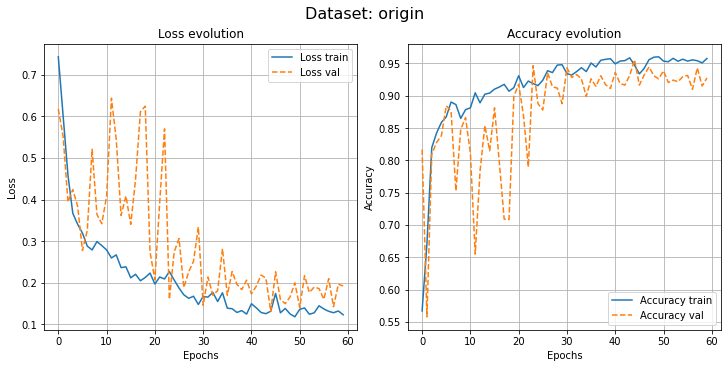

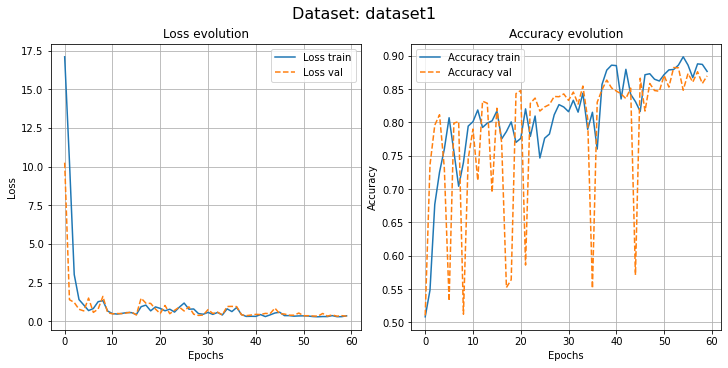

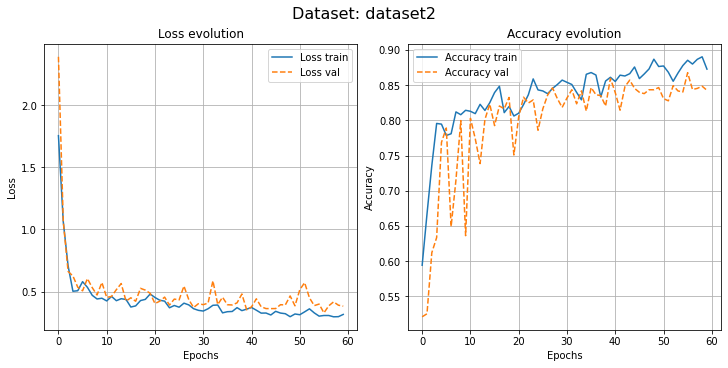

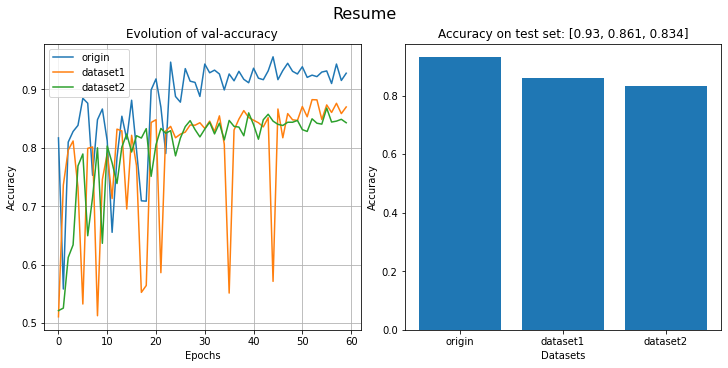

In [5]:
plot_hist(models)

# Save the three models

In [6]:
path = '../models/SAGE/'
for name, model, _, _ in models:
    torch.save(model, f'{path}SAGE_{name}')